### Initial imports

In [10]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv')

### Inspecting the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Getting the main info and cleaning

In [13]:
df.drop('Ticket', axis=1, inplace=True)

In [14]:
df['Male'] = np.where( df['Sex'] == 'male', 1, 0)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0


In [18]:
df = df.iloc[:, [1, 2, 3, 4, 5, 8, 9,10, 11]]
df.head(1)

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.25,NaN,S,1


In [19]:
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [21]:
pd.crosstab(df['Survived'], df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [23]:
df.groupby('Survived').agg({'Age' : 'median'})

,Age
Survived,
0,28.0
1,28.0


In [29]:
df.groupby('Survived').agg({'Fare' : 'mean'})

,Fare
Survived,
0,22.117887
1,48.395408


In [27]:
df.groupby('Survived').agg(
    {
        'Age': ['min', 'max'],
        'Fare' : ['median', 'mean', 'size']
    }
)

Age         Fare                
           min   max median       mean size
Survived                                   
0         1.00  74.0   10.5  22.117887  549
1         0.42  80.0   26.0  48.395408  342

In [30]:
df.corr()

,Survived,Pclass,Age,Fare,Male
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.131900
Age,-0.077221,-0.369226,1.000000,0.096067,0.093254
Fare,0.257307,-0.549500,0.096067,1.000000,-0.182333
Male,-0.543351,0.131900,0.093254,-0.182333,1.000000


### Plotting

<AxesSubplot:xlabel='Age', ylabel='Fare'>

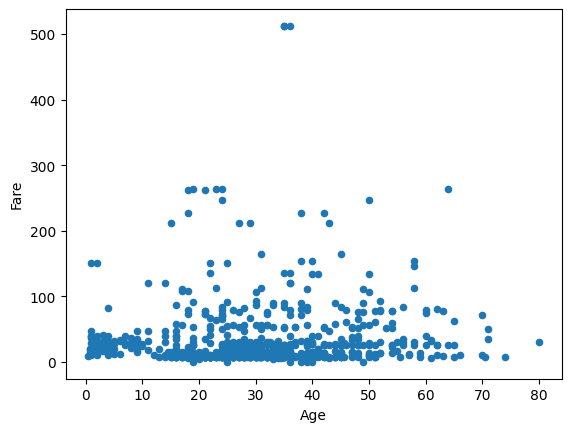

In [31]:
df.plot(x = 'Age', y = 'Fare', kind = 'scatter')

<AxesSubplot:xlabel='Survived'>

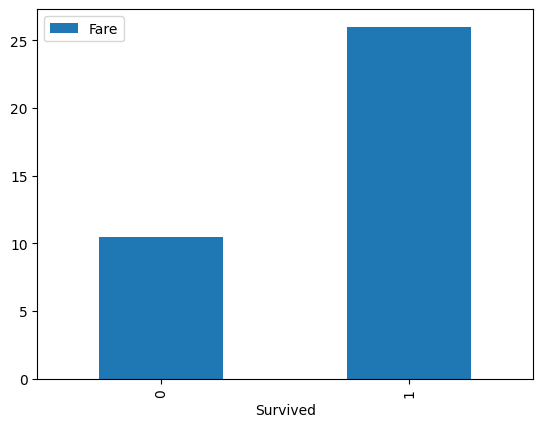

In [34]:
df.groupby('Survived').agg({'Fare': 'median'}).plot(kind='bar')

<AxesSubplot:ylabel='Survived'>

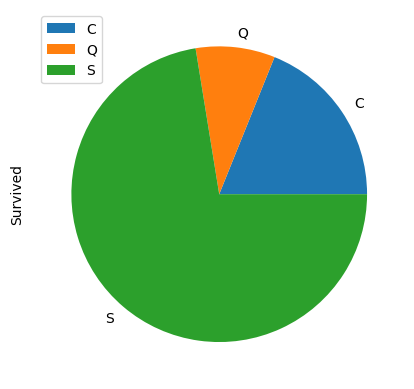

In [41]:
df.groupby('Embarked').count().plot(kind='pie', y='Survived')